### Imported the dataset using Pandas library

In [1]:
import pandas as pd

df = pd.read_csv('Copy of Customer Conversion Prediction - Customer Conversion Prediction.csv')


### The below code is to see how the columns of the dataframe look like

In [2]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


### The .decribe method will describe each and every column in the dataframe. since i have mentioned Include = 'all' inside the argument it will take all the column including column which consist of categorical values

In [3]:
df.describe(include = 'all')

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,3,NaN,12,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,cellular,NaN,may,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,29285,NaN,13766,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,NaN,NaN


### The .info method in python will show the information about the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


### The below code will show how many columns and rows are present in the dataset

In [5]:
df.shape

(45211, 11)

### The below code will show how many null values are there in the Dataframe.since there are no null values are present in the dataset.there is no need of data cleaning in this dataset

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

### The following countplot will show how many yes's and no's in the Target variable

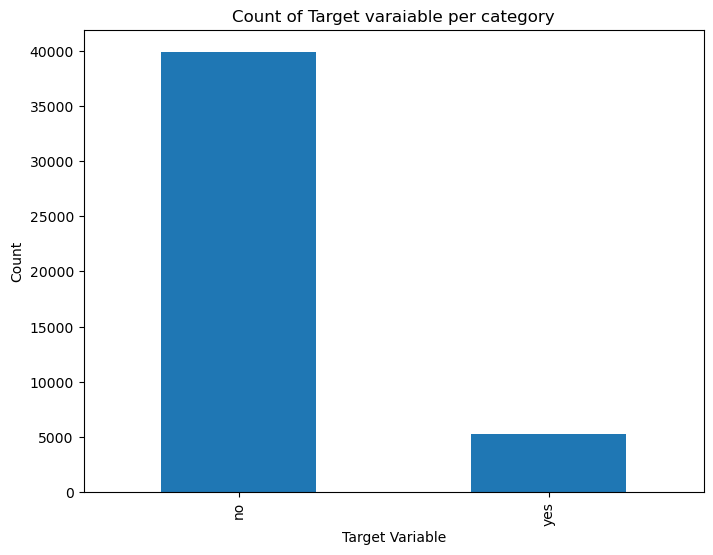

In [7]:
import matplotlib.pyplot as plt

df['y'].value_counts().plot(kind = 'bar',figsize = (8,6))
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.title('Count of Target varaiable per category')
plt.xticks(rotation = 90)
plt.show()

### After counting the values in the target columns the number of yes's = 5289  and the no's = 39922

In [8]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

### It seems that the counts of different variables differs too much so we are going to see how much of percentage that the varaible differs

In [9]:
100 * df['y'].value_counts()/len(df['y'])

no     88.30152
yes    11.69848
Name: y, dtype: float64

### The below code will display countplots for all the columns in the dataset and in every column it will show how many yes's and no's comparing to all the column

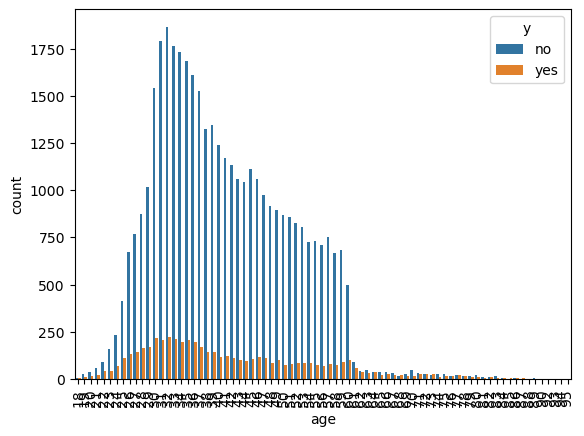

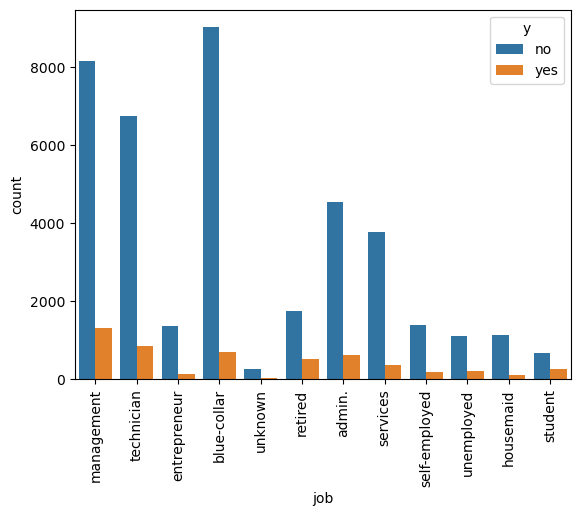

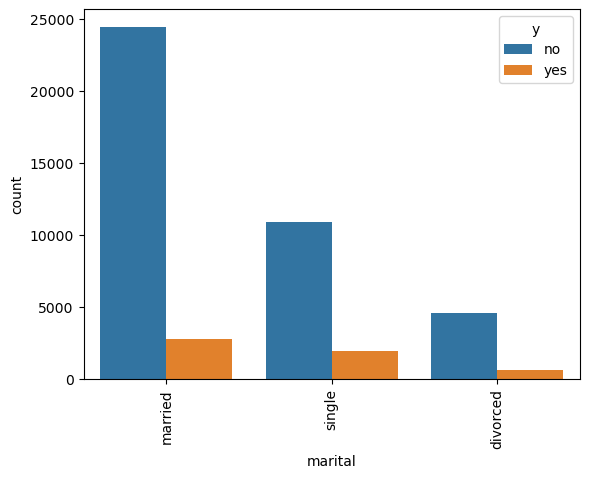

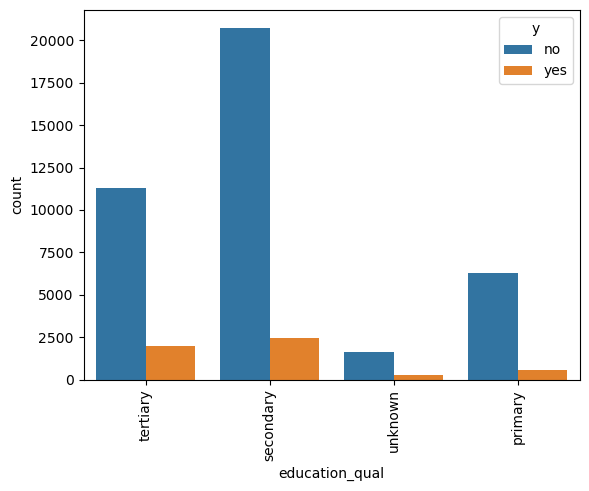

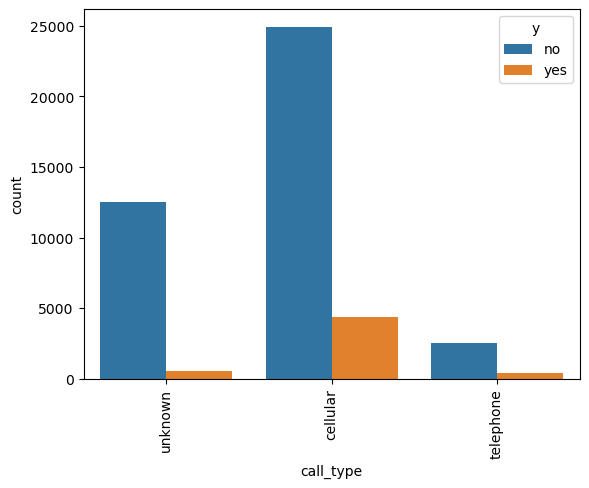

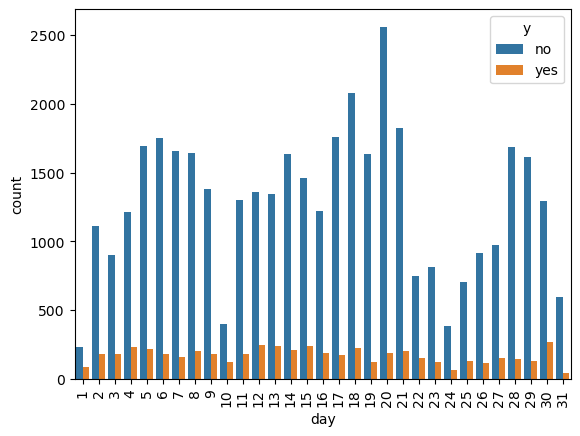

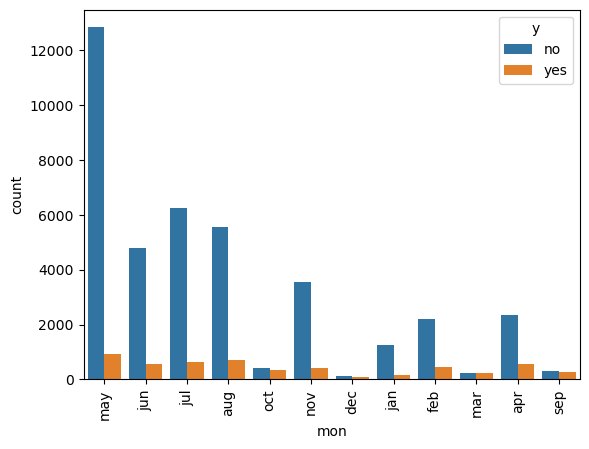

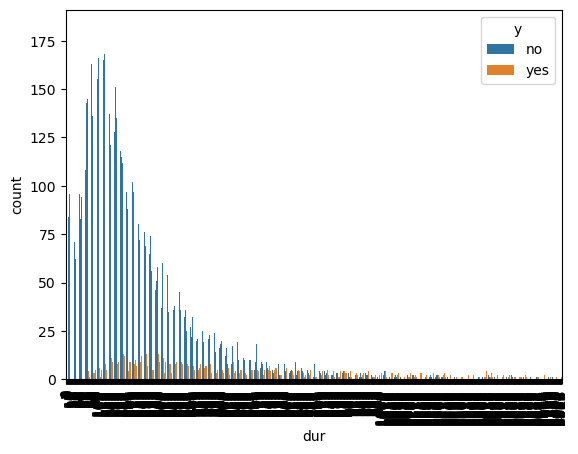

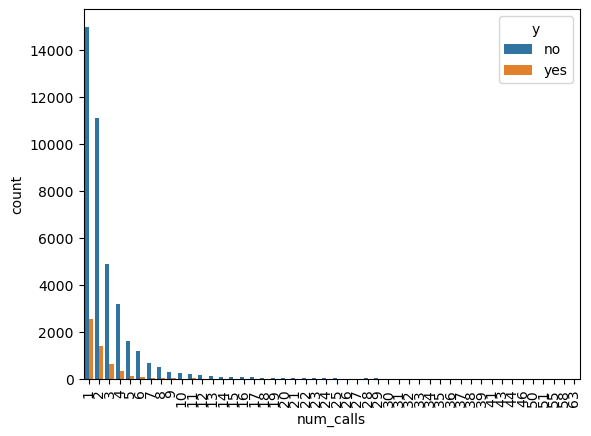

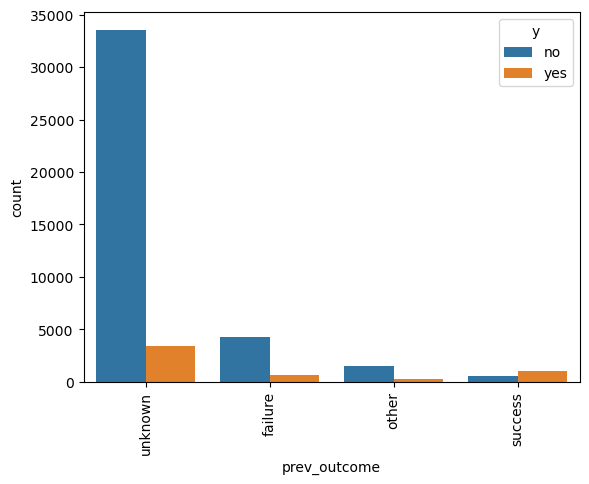

In [10]:
import seaborn as sns

for i,predictor in enumerate(df.drop(columns = ['y'])):
    plt.figure(i)
    sns.countplot(data = df,x = predictor,hue = 'y')
    plt.xticks(rotation = 90)

### The Data has mostly consists of categorical values and 4 of them are numerical values.All the columns in the Dataset are ordinal so i have choosen to go with OneHotEncoder in other names creating Dummies using pandas library

In [11]:
df_dummies = pd.get_dummies(df,drop_first = True)
df_dummies.head()

,age,day,dur,num_calls,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_other,prev_outcome_success,prev_outcome_unknown,y_yes
0,58,5,261,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,5,151,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,5,76,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,47,5,92,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,5,198,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


### After creating Dummies for all the categorical values. we will see the correlation between all the columns to target(y) column using a bar plot

<AxesSubplot: >

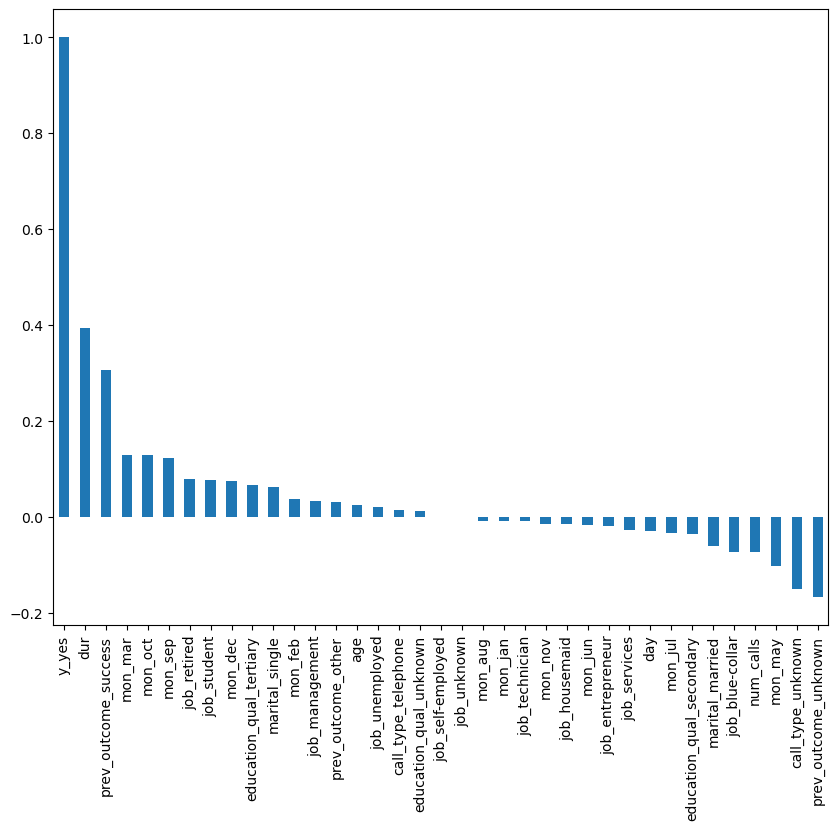

In [12]:
plt.figure(figsize=(10,8))
df_dummies.corr()['y_yes'].sort_values(ascending = False).plot(kind = 'bar')

### The below Heatmap will describe the correlation between all the columns to all the columns

<AxesSubplot: >

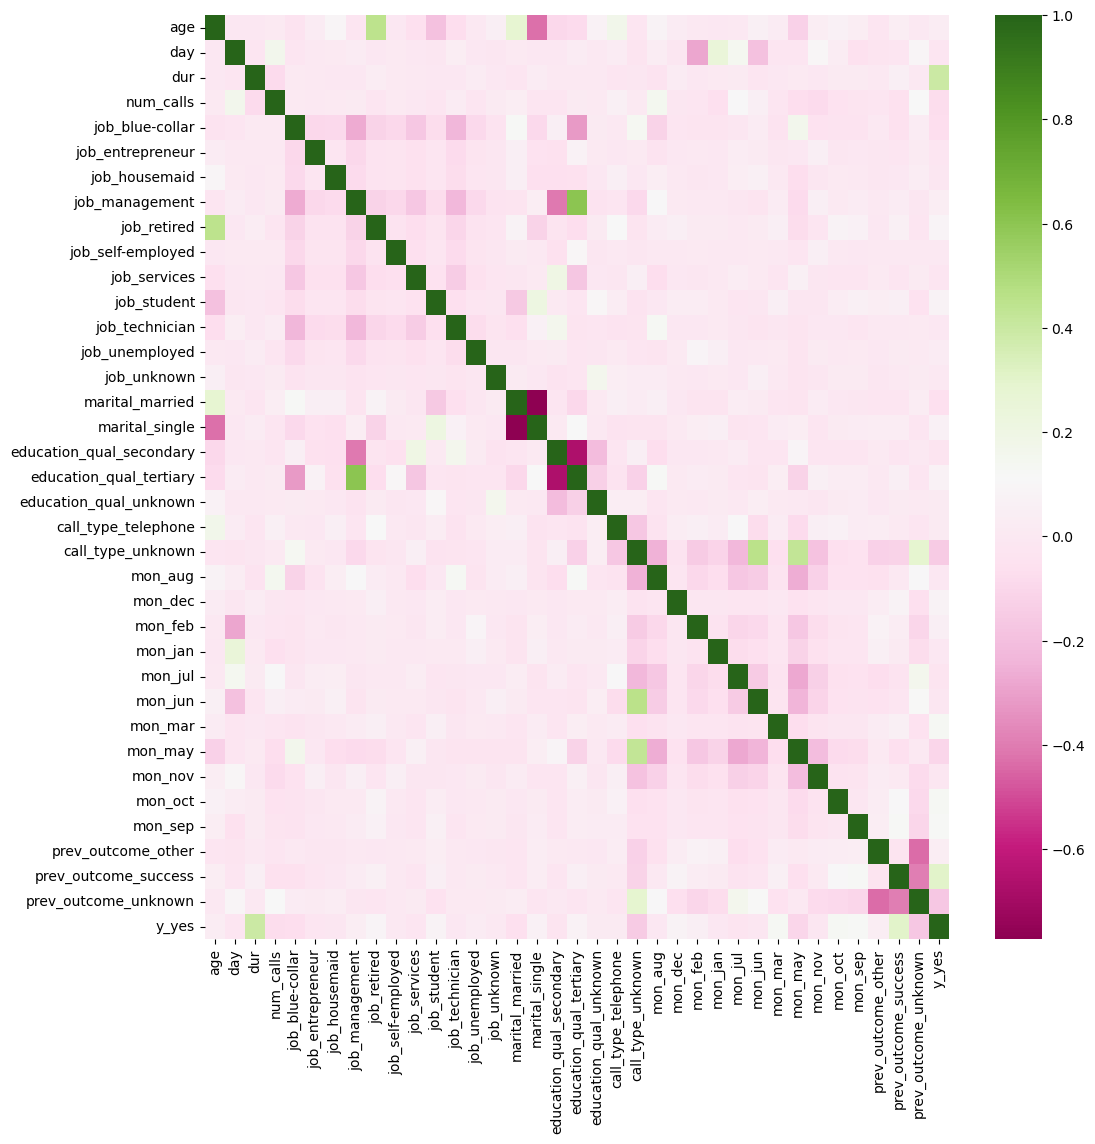

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(),cmap = 'PiYG')

### In the below code i have splitted the Dataset into x(features) and y(Target) for Model Selection

In [14]:
x = df_dummies.drop(['y_yes'],axis = 1)
y = df_dummies['y_yes']

### Since the dataset is so imbalanced we have to go with either under sampling or over sampling and in my project i have goes with one of the oversampling method SMOTE(Synthetic Minority Over-sampling Technique) to balance the dataset

In [15]:
from imblearn.over_sampling import SMOTE

x_res,y_res = SMOTE().fit_resample(x,y)

y_res.value_counts()

0    39922
1    39922
Name: y_yes, dtype: int64

### In the below code we have splitted the dataset into train and test using sklearn model selection

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.30,random_state=69)



### To standardize the data we have used Standard Scaler to standardize the data

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_test)

[[ 0.86215555 -0.51779948 -0.0914088  ... -0.16034841 -0.20532907
  -1.3708739 ]
 [ 0.77647426  0.20902409 -0.59486672 ... -0.16034841 -0.20532907
   0.7294617 ]
 [-0.16601996  0.69357314 -0.4355806  ... -0.16034841 -0.20532907
   0.7294617 ]
 ...
 [ 1.80464978 -0.76007401  0.07641051 ... -0.16034841 -0.20532907
   0.7294617 ]
 [ 0.94783685  1.54153397 -0.38722588 ... -0.16034841 -0.20532907
   0.7294617 ]
 [-0.16601996 -1.24462305  1.23692368 ... -0.16034841 -0.20532907
  -1.3708739 ]]


### The below code implements the Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score

log = LogisticRegression()

log.fit(x_train,y_train)

y_pred_log = log.predict(x_test)

log_Accuracy = accuracy_score(y_test,y_pred_log)

log_precision = precision_score(y_test,y_pred_log)

log_recall = recall_score(y_test,y_pred_log)

log_f1 = f1_score(y_test,y_pred_log)

print('The Accuracy Score for Logistic regression:',log_Accuracy)
print('Precision Score for Logistic Regression is:',log_precision)
print('recall scorefor logistic regression is:',log_recall)
print('F1 Score for logistic regression is:',log_f1)

The Accuracy Score for Logistic regression: 0.9197211321699925
Precision Score for Logistic Regression is: 0.9260829024328219
recall scorefor logistic regression is: 0.9122411489645958
F1 Score for logistic regression is: 0.9191099146090103


### The below code implements the Support Vector Machine Model

### Since it will take to much time to predict using SVM from Sklearn so that i have also used the sklearnex library which is Intel(r) Extension 

In [19]:
from sklearnex import patch_sklearn
patch_sklearn()

from sklearn import svm

svm = svm.SVC(probability=True)

svm.fit(x_train,y_train)

y_pred_svm = svm.predict(x_test)

svm_accuracy = accuracy_score(y_test,y_pred_svm)

print('accuracy score using svm is:',svm_accuracy)

svm_precision = precision_score(y_test,y_pred_svm)

print('precision_score using svm is:',svm_precision)

svm_recall = recall_score(y_test,y_pred_svm)

print('recall score using svm is:',svm_recall)

svm_f1 = f1_score(y_test,y_pred_svm)

print('f1 score using svm is',svm_f1)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


accuracy score using svm is: 0.9284044418468732
precision_score using svm is: 0.9386917486105173
recall score using svm is: 0.9166666666666666
f1 score using svm is 0.9275484770394152


### The below code implements the K-nearest neighbour Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

y_pred_knn = knn.predict(x_test)

knn_accuracy = accuracy_score(y_test,y_pred_knn)

knn_precision = precision_score(y_test,y_pred_knn)

knn_recall = recall_score(y_test,y_pred_knn)

knn_f1 = f1_score(y_test,y_pred_knn)

print('accuarcy score using knn is:',knn_accuracy)
print('precision score using knn is:',knn_precision)
print('recall score using knn is:',knn_recall)
print('f1 score using knn is:',knn_f1)

accuarcy score using knn is: 0.9228103865742674
precision score using knn is: 0.9365462539874128
recall score using knn is: 0.9070641282565131
f1 score using knn is: 0.9215694591728526


### The below code implements the Decision Tree Model

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

y_pred_dt = dt.predict(x_test)

dt_accuracy = accuracy_score(y_test,y_pred_dt)

dt_precision = precision_score(y_test,y_pred_dt)

dt_recall = recall_score(y_test,y_pred_dt)

dt_f1 = f1_score(y_test,y_pred_dt)

print('accuarcy score using knn is:',dt_accuracy)
print('precision score using knn is:',dt_precision)
print('recall score using knn is:',dt_recall)
print('f1 score using knn is:',dt_f1)

accuarcy score using knn is: 0.9186357184603824
precision score using knn is: 0.9123961503660443
recall score using knn is: 0.9261857047428189
f1 score using knn is: 0.9192392160112708


### The below code implements the Random Forest Model

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)

rf_accuracy = accuracy_score(y_test,y_pred_rf)

rf_precision = precision_score(y_test,y_pred_rf)

rf_recall = recall_score(y_test,y_pred_rf)

rf_f1 = f1_score(y_test,y_pred_rf)

print('accuarcy score using knn is:',rf_accuracy)
print('precision score using knn is:',rf_precision)
print('recall score using knn is:',rf_recall)
print('f1 score using knn is:',rf_f1)

accuarcy score using knn is: 0.9416381397678885
precision score using knn is: 0.9404563624250499
recall score using knn is: 0.9429692718770875
f1 score using knn is: 0.941711140760507


### The below code implements the Gradient Boosting Model

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(x_train,y_train)

y_pred_gbc = gbc.predict(x_test)

gbc_accuracy = accuracy_score(y_test,y_pred_gbc)

gbc_precision = precision_score(y_test,y_pred_gbc)

gbc_recall = recall_score(y_test,y_pred_gbc)

gbc_f1 = f1_score(y_test,y_pred_gbc)

print('accuarcy score using knn is:',gbc_accuracy)
print('precision score using knn is:',gbc_precision)
print('recall score using knn is:',gbc_recall)
print('f1 score using knn is:',gbc_f1)

accuarcy score using knn is: 0.9218502129080738
precision score using knn is: 0.9166941603431211
recall score using knn is: 0.9280227120908484
f1 score using knn is: 0.9223236514522822


### The below code is to compare accuracy score from all the different model

In [24]:
final_data = pd.DataFrame({
    'Models':['LR','SVC','KNN','DT','RF','GBC'],
    'Accuracy':[log_Accuracy,
                svm_accuracy,
                knn_accuracy,
                dt_accuracy,
                rf_accuracy,
                gbc_accuracy],
    
})

### printing the comparison of accuracy scores

In [25]:
final_data

,Models,Accuracy
0,LR,0.919721
1,SVC,0.928404
2,KNN,0.922810
3,DT,0.918636
4,RF,0.941638
5,GBC,0.921850


### A bar plot to comapare different accuarcy scores from different models

<AxesSubplot: xlabel='Models', ylabel='Accuracy'>

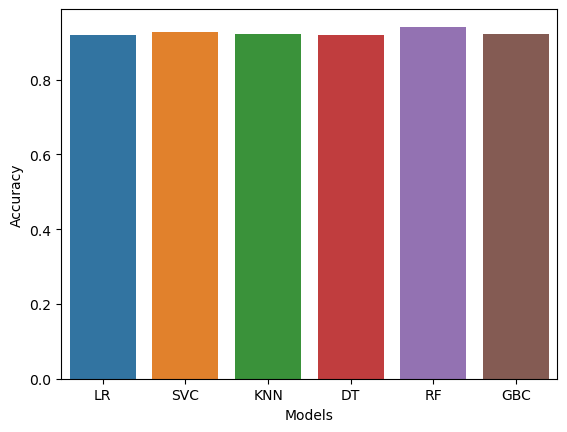

In [26]:
sns.barplot(x = final_data['Models'],y = final_data['Accuracy'])

### The below code is to compare Precision score from all the different model

In [27]:
final_data_pre = pd.DataFrame({
    'Models':['LR','SVC','KNN','DT','RF','GBC'],
    'Precision':[log_precision,
                svm_precision,
                knn_precision,
                dt_precision,
                rf_precision,
                gbc_precision],
    
})

### printing the comparison of precision scores

In [28]:
final_data_pre

,Models,Precision
0,LR,0.926083
1,SVC,0.938692
2,KNN,0.936546
3,DT,0.912396
4,RF,0.940456
5,GBC,0.916694


### A bar plot to comapare different precision scores from different models

<AxesSubplot: xlabel='Models', ylabel='Precision'>

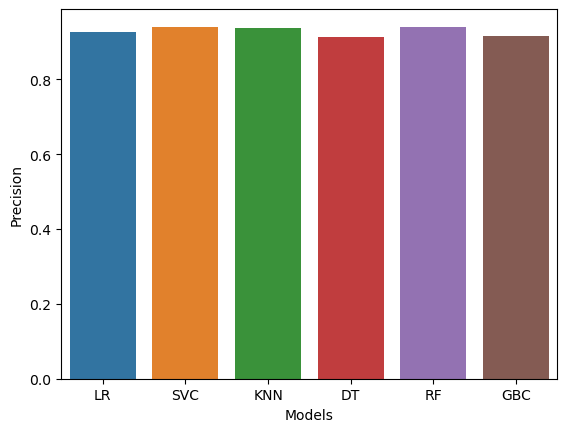

In [29]:
sns.barplot(x = final_data_pre['Models'],y = final_data_pre['Precision'])

### The below code is to see the confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred_log)

array([[11106,   872],
       [ 1051, 10925]], dtype=int64)

### The below code is to show the predicted probabilities from the dataset

In [31]:
r_probs = [0 for _ in range(len(y_test))]
log_probs = log.predict_proba(x_test)
svm_probs = svm.predict_proba(x_test)
knn_probs = knn.predict_proba(x_test)
dt_probs = dt.predict_proba(x_test)
rf_probs = rf.predict_proba(x_test)
gbc_probs = gbc.predict_proba(x_test)

### To find the dimensions of the predicted probabilities we have used the ndim from numpy library

In [32]:
import numpy as np
print('The dimensions of the Logistic regression is:',np.ndim(log_probs))
print('The dimensions of the SVM is:',np.ndim(svm_probs))
print('The dimensions of the KNN is:',np.ndim(knn_probs))
print('The dimensions of the decision trees is:',np.ndim(dt_probs))
print('The dimensions of the Random Forest is:',np.ndim(rf_probs))
print('The dimensions of the GBC is:',np.ndim(gbc_probs))

The dimensions of the Logistic regression is: 2
The dimensions of the SVM is: 2
The dimensions of the KNN is: 2
The dimensions of the decision trees is: 2
The dimensions of the Random Forest is: 2
The dimensions of the GBC is: 2


### Converted the 2d Array to a 1d array

In [33]:
log_probs = log_probs[:,1]
svm_probs = svm_probs[:,1]
knn_probs = knn_probs[:,1]
dt_probs =  dt_probs[:,1]
rf_probs = rf_probs[:,1]
gbc_probs = gbc_probs[:,1]

### Imported and finded AUC Acore of all the diiferent Models

In [34]:
from sklearn.metrics import auc,roc_auc_score,roc_curve

log_auc = roc_auc_score(y_test,log_probs)
svm_auc = roc_auc_score(y_test,svm_probs)
knn_auc = roc_auc_score(y_test,knn_probs)
dt_auc = roc_auc_score(y_test,dt_probs)
rf_auc = roc_auc_score(y_test,rf_probs)
gbc_auc = roc_auc_score(y_test,gbc_probs)

### Printed AUROC Score for all the model

In [35]:
print('Logistic Regression : AUROC = %0.3f'%log_auc)
print('Support Vector Machine : AUROC = %0.3f'%svm_auc)
print('KNN : AUROC = %0.3f'%knn_auc)
print('Decision Tree : AUROC = %0.3f'%dt_auc)
print('Random Forest : AUROC = %0.3f'%rf_auc)
print('GBC : AUROC = %0.3f'%gbc_auc)

Logistic Regression : AUROC = 0.974
Support Vector Machine : AUROC = 0.981
KNN : AUROC = 0.966
Decision Tree : AUROC = 0.919
Random Forest : AUROC = 0.989
GBC : AUROC = 0.978


### Fitting the y_test and predicted probabilities into the ROC curve

In [36]:
log_fpr,log_tpr, _ = roc_curve(y_test,log_probs)
svm_fpr,svm_tpr, _ = roc_curve(y_test,svm_probs)
knn_fpr,knn_tpr, _ = roc_curve(y_test,knn_probs)
dt_fpr,dt_tpr, _ = roc_curve(y_test,dt_probs)
rf_fpr,rf_tpr, _ = roc_curve(y_test,rf_probs)
gbc_fpr,gbc_tpr, _ = roc_curve(y_test,gbc_probs)

### Created a function that can plot the AUROC curve

In [37]:
def plot_roc_curve(rf_fpr,rf_tpr):
    plt.plot(log_fpr,log_tpr,marker= '.',label = 'Logistic Regression(AUROC = %0.3f)'%log_auc)
    plt.plot(svm_fpr,svm_tpr,marker= '.',label = 'Support Vector Machine(AUROC = %0.3f)'%svm_auc)
    plt.plot(knn_fpr,knn_tpr,marker= '.',label = 'KNearest Neighbor(AUROC = %0.3f)'%knn_auc)
    plt.plot(dt_fpr,dt_tpr,marker= '.',label = 'Decision Tree(AUROC = %0.3f)'%dt_auc)
    plt.plot(rf_fpr,rf_tpr,marker= '.',label = 'Random Forest(AUROC = %0.3f)'%rf_auc)
    plt.plot(gbc_fpr,gbc_tpr,marker= '.',label = 'Gradient Boosting Classifier(AUROC = %0.3f)'%gbc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

### Calling the Function

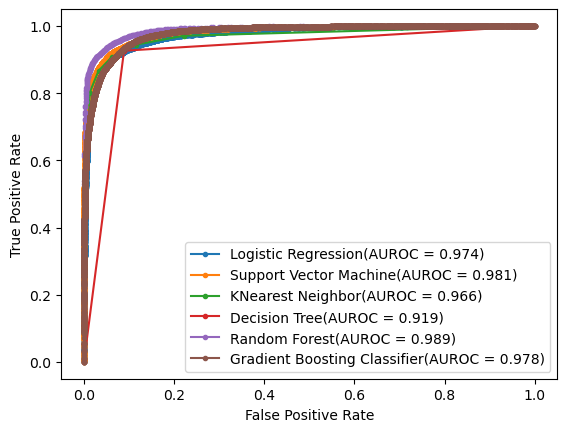

In [38]:
plot_roc_curve(rf_fpr,rf_tpr)